In [1]:
import pandas as pd
import numpy as np

In [19]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp'] ##user id and ratings data set
ds=pd.read_csv("C:\\Users\\piyus\\OneDrive\\Desktop\\Movie-Recommender-in-python-master\\u.data",sep='\t',names=column_names)

In [11]:
print(ds)

        user_id  item_id  rating  timestamp
0             0       50       5  881250949
1             0      172       5  881250949
2             0      133       1  881250949
3           196      242       3  881250949
4           186      302       3  891717742
...         ...      ...     ...        ...
99998       880      476       3  880175444
99999       716      204       5  879795543
100000      276     1090       1  874795795
100001       13      225       2  882399156
100002       12      203       3  879959583

[100003 rows x 4 columns]


In [18]:
movie=pd.read_csv("C:\\Users\\piyus\\OneDrive\\Desktop\\Movie-Recommender-in-python-master\\Movie_Id_Titles") ##movie titles set

In [13]:
print(movie)

      item_id                                      title
0           1                           Toy Story (1995)
1           2                           GoldenEye (1995)
2           3                          Four Rooms (1995)
3           4                          Get Shorty (1995)
4           5                             Copycat (1995)
...       ...                                        ...
1677     1678                          Mat' i syn (1997)
1678     1679                           B. Monkey (1998)
1679     1680                       Sliding Doors (1998)
1680     1681                        You So Crazy (1994)
1681     1682  Scream of Stone (Schrei aus Stein) (1991)

[1682 rows x 2 columns]


In [59]:
ds1= pd.merge(ds,movie,on='item_id') ##merging titles in data set

In [34]:
ds1.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [37]:
ds_new=ds1[['title','rating']]

In [39]:
ds_new.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [40]:
ds_new.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [49]:
ratings=pd.DataFrame(ds_new.groupby('title')['rating'].mean())
ratings['No. of Ratings']=pd.DataFrame(ds_new.groupby('title')['rating'].count())

In [50]:
ratings.head()

,rating,No. of Ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


<AxesSubplot:>

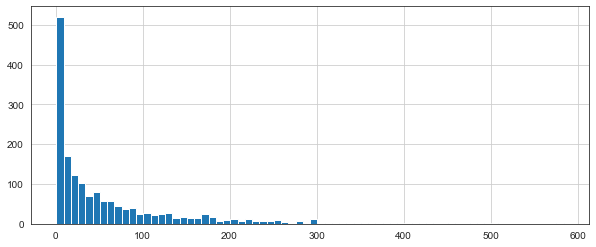

In [52]:
plt.figure(figsize=(10,4))
ratings['No. of Ratings'].hist(bins=70)

<AxesSubplot:>

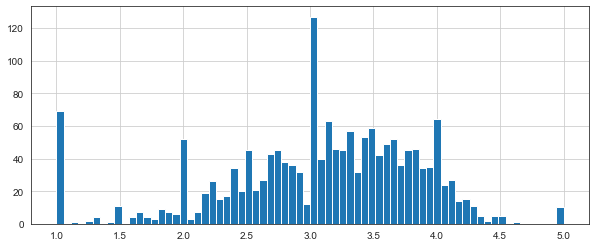

In [53]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

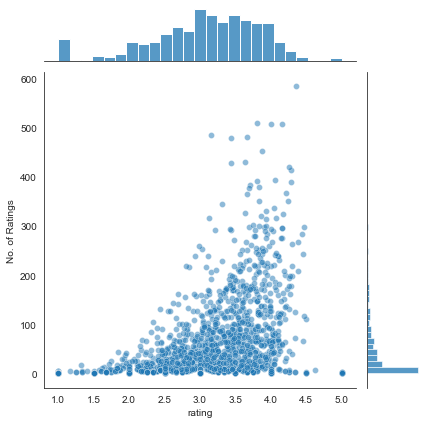

In [54]:
sns.jointplot(x='rating',y='No. of Ratings',data=ratings,alpha=0.5)

In [56]:
moviemat = ds1.pivot_table(index='user_id',columns='title',values='rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
ratings.sort_values('No. of Ratings',ascending=False).head(10)

,rating,No. of Ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [60]:
## let's select 2 movies ,star wars and liar liar
starwars_user_ratings = moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [61]:
##using corrwith() method , we can get corelation between 2 series
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

C:\Users\piyus\anaconda3\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\piyus\anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [62]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [63]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [65]:
corr_starwars = corr_starwars.join(ratings['No. of Ratings'])
corr_starwars.head()

,Correlation,No. of Ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [67]:
##drop movies which have less than 100 reviews
corr_starwars[corr_starwars['No. of Ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,No. of Ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [70]:
## similarly applying above steps to liar liar movie 
corr_liarliar = pd.DataFrame(similar_to_liarliar,columns=['Correlation'])
corr_liarliar.dropna(inplace=True)
corr_liarliar = corr_liarliar.join(ratings['No. of Ratings'])
corr_liarliar[corr_liarliar['No. of Ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,No. of Ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137


In [71]:
## here we now got co-related movies to a particular movie and we can perform this to any of those listed movies 